In [1]:
import pandas as pd
import numpy as np
import random
import datetime as dt
import calendar
import os
#loads data using all filepaths
import glob
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#phone: [Price, Weight (1-12, 12 being the most frequntly purchased)]
phones = { 'iPhone 13':[1000, 12],
          'iPhone 12':[700,8],
          'Samsung Galexy S22':[1100,10],
          'Samsung Galexy S21':[800,7],
          'Samsung Galexy S10':[300,4],
          'Huawei':[350,7],
          'Nokia c200':[400,4],
          'Google Android': [900,6],
          'iPhone 11':[500, 9],
          'Sony Xperia 10':[700,5],
          'Sony Xperia 5':[450,4],
          'Nokia c100':[200,2]}

In [3]:
# Columns for Dataframe
columns = ['Order ID', 'Phone', 'Quatity Ordered', 'Price Each', 'Order Date', 'Purchase Country_City']

In [33]:
def gen_random_country_city():
    
    companies = ['Provider_1','Provider_2','Provider_3','Provider_4','Provider_5','Provider_6','Provider_7','Provider_8','Provider_9','Provider_10',
               'Provider_11','Provider_12','Provider_13','Provider_14','Provider_15','Provider_16','Provider_17','Provider_18','Provider_19','Provider_20']
    countries = ["China","India","United States","Indonesia","Brazil","Russia","Japan","Mexico","Nigeria","Philippines",
              "Germany","Vietnam","Bangladesh","Turkey","Iran","Egypt","Pakistan","Thailand","Italy","South Africa"]
    weights = [30, 29, 26, 26, 25, 23, 20, 19, 18, 18, 18, 16, 16, 15, 15, 14, 12, 11, 10, 10]
    cities = ["Beijing","Delhi","Boston","Jakarta","Sao Paulo","Moscow","Yokohama","Mexico City","Lagos","Manila",
            "Munich","Hanoi","Dhaka","Ankara","Isfahan","Giza","Islamabad","Bangkok","Milan","Durban"]
    
    index = random.choices(range(len(countries)), weights = weights)[0]
    
    return f"{companies[index]},{cities[index]}, {countries[index]}"



In [34]:
#genderate random date/time in 
def generate_random_dt(month):
    day_range = calendar.monthrange(2022,month)[1]
    random_day = random.randint(1, day_range)
    if random.random() < 0.5:
        date = dt.datetime(2022,month, random_day, 12, 0)
    else:
        date = dt.datetime(2022,month, random_day, 20, 0)
        
    time_offset = np.random.normal(loc=0, scale = 180)
    final_date = date + dt.timedelta(minutes=time_offset)
    
    return final_date.strftime("%d/%m/%y %H:%M ")#


In [35]:
#get names of phones
phone_list = [phone for phone in phones]
weights = [phones[phone][1] for phone in phones]

In [36]:

order_id = 124554

#os.mkdir('Monthly_Data')

for month_val in range (1,13):
    
    if month_val <= 10:
        orders_amt = int(np.random.normal(loc=2000, scale=100))
    if month_val == 11:
        orders_amt = int(np.random.normal(loc=3500, scale=200 ))
    if month_val == 12:
        orders_amt = int(np.random.normal(loc=5000, scale=200))
    df = pd.DataFrame(columns = columns)
    
    for i in range(orders_amt):

        location = gen_random_country_city()
        date = generate_random_dt(month_val)
        
        phone = random.choices(phone_list, weights = weights)[0]
        price = phones[phone][0]
        quantity_ordered = np.random.geometric(p=.6-(1.0/price), size=1)[0]
        df.loc[i] = [order_id, phone, quantity_ordered, price, date, location]
        
        order_id += 1
        
   
    month_name = calendar.month_name[month_val]
    df.to_csv( f"C:/Users/elyn/Documents/ProgDA/Monthly_Data/{month_name}_data.csv", index=False)



In [38]:

# merging all csv files
#annual_df = pd.concat(
#    map(pd.read_csv, ['January_data.csv', 'February_data.csv', 'March_data.csv', 'April_data.csv', 'May_data.csv', 'June_data.csv', 'July_data.csv', 'August_data.csv', 'September_data.csv', 
#                     'October_data.csv', 'November_data.csv', 'December_data.csv']), ignore_index=True)
#annual_df.to_csv("Annual_data.csv", index=False)


# get data file names
path =r'C:\Users\elyn\Documents\ProgDA\Monthly_Data'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
annual_df = pd.concat(dfs, ignore_index=True)
#annual_df["Order Date"] = pd.to_datetime(annual_df["Order Date"])
#annual_df = annual_df.sort_values(by="Order Date")
annual_df.to_csv("Annual_data.csv", index=False)

In [39]:
annual_df.dtypes



Order ID                  int64
Phone                    object
Quatity Ordered           int64
Price Each                int64
Order Date               object
Purchase Country_City    object
dtype: object

In [40]:
annual_df

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City
0,130767,Samsung Galexy S21,2,800,04/04/22 10:02,"Provider_11,Munich, Germany"
1,130768,iPhone 13,1,1000,02/04/22 09:47,"Provider_9,Lagos, Nigeria"
2,130769,iPhone 13,1,1000,29/04/22 09:06,"Provider_6,Moscow, Russia"
3,130770,Samsung Galexy S22,1,1100,28/04/22 17:32,"Provider_2,Delhi, India"
4,130771,Samsung Galexy S22,1,1100,10/04/22 00:48,"Provider_7,Yokohama, Japan"
...,...,...,...,...,...,...
28793,142793,iPhone 13,1,1000,01/09/22 07:50,"Provider_13,Dhaka, Bangladesh"
28794,142794,Samsung Galexy S21,3,800,14/09/22 14:28,"Provider_4,Jakarta, Indonesia"
28795,142795,iPhone 13,2,1000,08/09/22 18:34,"Provider_5,Sao Paulo, Brazil"
28796,142796,Huawei,1,350,03/09/22 21:16,"Provider_17,Islamabad, Pakistan"


## Add columns for Analysis

#### Month Column

In [41]:
annual_df['Quatity Ordered'] = annual_df['Quatity Ordered'].astype('int32')
annual_df['Price Each'] = annual_df['Price Each'].astype('int32')
Sales = (annual_df['Quatity Ordered']) * (annual_df['Price Each'])


In [44]:
annual_df.loc[annual_df['Quatity Ordered'] == 1, 'No Discount - Single Purchase'] = Sales
annual_df.loc[annual_df['Quatity Ordered'] == 2, 'Sales_Less_Discount(8%)'] = (Sales/100) * 92
annual_df.loc[annual_df['Quatity Ordered'] == 3, 'Sales_Less_Discount(8%)'] = (Sales/100) * 92
annual_df.loc[annual_df['Quatity Ordered'] >= 4, 'Sales_Less_Discount(15%)'] = (Sales/100) * 85
annual_df.loc[annual_df['Quatity Ordered'] >= 4, 'Sales_Less_Discount(15%)'] = (Sales/100) * 85
annual_df['All sales'] = annual_df.fillna(0)['No Discount - Single Purchase'] + annual_df.fillna(0)['Sales_Less_Discount(8%)'] + annual_df.fillna(0)['Sales_Less_Discount(15%)']

In [45]:
annual_df['All sales'] = annual_df.fillna(0)['No Discount - Single Purchase'] + annual_df.fillna(0)['Sales_Less_Discount(8%)'] + annual_df.fillna(0)['Sales_Less_Discount(15%)']


In [46]:
annual_df

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
0,130767,Samsung Galexy S21,2,800,04/04/22 10:02,"Provider_11,Munich, Germany",NaN,1472.0,NaN,1472.0
1,130768,iPhone 13,1,1000,02/04/22 09:47,"Provider_9,Lagos, Nigeria",1000.0,NaN,NaN,1000.0
2,130769,iPhone 13,1,1000,29/04/22 09:06,"Provider_6,Moscow, Russia",1000.0,NaN,NaN,1000.0
3,130770,Samsung Galexy S22,1,1100,28/04/22 17:32,"Provider_2,Delhi, India",1100.0,NaN,NaN,1100.0
4,130771,Samsung Galexy S22,1,1100,10/04/22 00:48,"Provider_7,Yokohama, Japan",1100.0,NaN,NaN,1100.0
...,...,...,...,...,...,...,...,...,...,...
28793,142793,iPhone 13,1,1000,01/09/22 07:50,"Provider_13,Dhaka, Bangladesh",1000.0,NaN,NaN,1000.0
28794,142794,Samsung Galexy S21,3,800,14/09/22 14:28,"Provider_4,Jakarta, Indonesia",NaN,2208.0,NaN,2208.0
28795,142795,iPhone 13,2,1000,08/09/22 18:34,"Provider_5,Sao Paulo, Brazil",NaN,1840.0,NaN,1840.0
28796,142796,Huawei,1,350,03/09/22 21:16,"Provider_17,Islamabad, Pakistan",350.0,NaN,NaN,350.0


In [49]:
annual_df['Month'] = annual_df['Order Date'].str[3:5]
annual_df['Month'] = annual_df['Month'].astype('int32')
annual_df.sample(5)

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales,Month
8195,152768,iPhone 12,3,700,14/12/22 11:18,"Provider_2,Delhi, India",NaN,1932.0,NaN,1932.0,12
772,131539,Huawei,2,350,18/04/22 10:56,"Provider_14,Ankara, Turkey",NaN,644.0,NaN,644.0,4
16129,135783,Huawei,2,350,14/06/22 11:16,"Provider_2,Delhi, India",NaN,644.0,NaN,644.0,6
9975,127817,iPhone 12,2,700,14/02/22 01:07,"Provider_10,Manila, Philippines",NaN,1288.0,NaN,1288.0,2
18630,130262,Huawei,3,350,29/03/22 09:34,"Provider_5,Sao Paulo, Brazil",NaN,966.0,NaN,966.0,3


In [48]:
annual_df['Month'] = annual_df['Month'].astype('int32')
annual_df.dtypes

Order ID                           int64
Phone                             object
Quatity Ordered                    int32
Price Each                         int32
Order Date                        object
Purchase Country_City             object
No Discount - Single Purchase    float64
Sales_Less_Discount(8%)          float64
Sales_Less_Discount(15%)         float64
All sales                        float64
Month                              int32
dtype: object

### Month plot


In [50]:
months_res = annual_df.groupby(('Month'), as_index=False).sum()
months_res

,Month,Order ID,Quatity Ordered,Price Each,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
0,1,260114172,3456,1449800,853700.0,1053078.0,373872.5,2280650.5
1,2,272218333,3563,1518450,920850.0,1074974.0,364820.0,2360644.0
2,3,261592831,3371,1436100,875600.0,968622.0,395080.0,2239302.0
3,4,249859546,3195,1313600,784150.0,908178.0,385772.5,2078100.5
4,5,269347286,3486,1426650,824150.0,1065130.0,420835.0,2310115.0
5,6,283798378,3523,1474450,880200.0,1080678.0,345950.0,2306828.0
6,7,282613027,3368,1434450,882550.0,983756.0,350327.5,2216633.5
7,8,264156799,3142,1339050,782150.0,969864.0,351050.0,2103064.0
8,9,295978060,3463,1478700,899550.0,1018716.0,380800.0,2299066.0
9,10,310920812,3559,1521750,911800.0,1079620.0,369537.5,2360957.5


Text(0, 0.5, 'Sales in (€)')

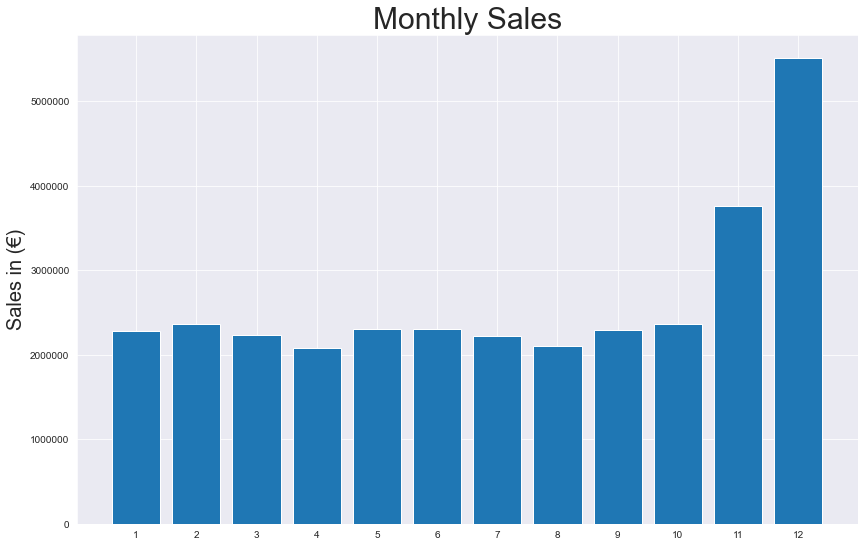

In [60]:

months = range(1,13)
plt.figure(figsize = (14, 9))
plt.ticklabel_format(style='plain')
plt.bar(months, months_res['All sales'])
plt.xticks(months)
plt.title("Monthly Sales", fontsize = 30)
plt.ylabel("Sales in (€)", fontsize = 20)

In [61]:
months_res['All sales']

0     2280650.5
1     2360644.0
2     2239302.0
3     2078100.5
4     2310115.0
5     2306828.0
6     2216633.5
7     2103064.0
8     2299066.0
9     2360957.5
10    3761086.5
11    5513359.5
Name: All sales, dtype: float64

### Shop with highest number of sales by city

In [21]:
data_by_bus = annual_df.groupby('Purchase Country_City', as_index=False).sum()
data_by_bus.set_index('Purchase Country_City', inplace=False)
data_by_bus

,Purchase Country_City,Order ID,Quatity Ordered,Price Each,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
0,"Sim_Company_1,Beijing, China",312689897,3747,1593150,16225,962050.0,1094064.0,414332.5,2470446.5
1,"Sim_Company_10,Manila, Philippines",189447314,2263,953650,9975,575000.0,678730.0,232900.0,1486630.0
2,"Sim_Company_11,Munich, Germany",185329862,2213,932350,9842,567600.0,639906.0,238042.5,1445548.5
3,"Sim_Company_12,Hanoi, Vietnam",177520836,2119,928550,9257,561050.0,667874.0,209482.5,1438406.5
4,"Sim_Company_13,Dhaka, Bangladesh",166540310,1976,843200,8841,503850.0,616262.0,181007.5,1301119.5
5,"Sim_Company_14,Ankara, Turkey",160905512,1945,840200,8351,501650.0,590088.0,212330.0,1304068.0
6,"Sim_Company_15,Isfahan, Iran",151795242,1820,771800,8004,482150.0,496754.0,217345.0,1196249.0
7,"Sim_Company_16,Giza, Egypt",150992387,1797,749000,7889,450500.0,530104.0,188615.0,1169219.0
8,"Sim_Company_17,Islamabad, Pakistan",126235156,1519,648050,6713,379050.0,483506.0,164645.0,1027201.0
9,"Sim_Company_18,Bangkok, Thailand",116987684,1405,601150,5915,368350.0,408434.0,152107.5,928891.5


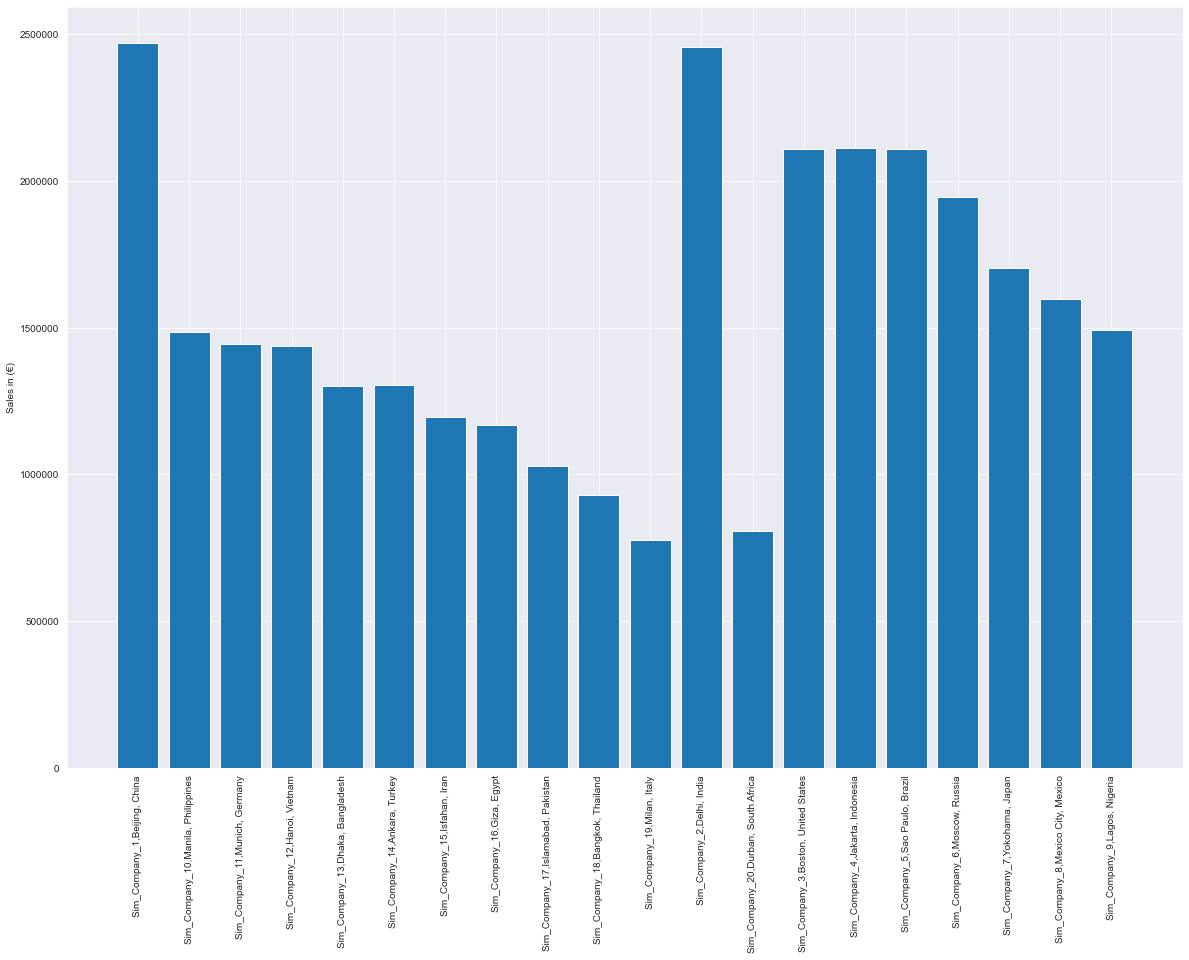

In [58]:
cities = [city for city, annual_df in data_by_bus.groupby('Purchase Country_City')]
plt.figure(figsize = (20, 14))
plt.ticklabel_format(style='plain')
plt.bar(cities, data_by_bus['All sales'], label ='All Sales By City')

plt.xticks(cities, rotation = 90)
plt.ylabel("Sales in (€)")
#plt.xlabel("City Name")
plt.show()

# Frequency of Orders per hour

In [23]:
annual_df['Order Date'] = pd.to_datetime(annual_df['Order Date'])

In [24]:
annual_df['Hour'] = annual_df['Order Date'].dt.hour
annual_df['Minute'] = annual_df['Order Date'].dt.minute
annual_df['Count'] = 1
annual_df.head()

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales,Hour,Minute,Count
0,130513,iPhone 11,2,500,2022-09-04 17:36:00,"Sim_Company_9,Lagos, Nigeria",4,NaN,920.0,NaN,920.0,17,36,1
1,130514,Nokia c200,1,400,2022-04-18 11:30:00,"Sim_Company_1,Beijing, China",4,400.0,NaN,NaN,400.0,11,30,1
2,130515,iPhone 13,1,1000,2022-04-18 18:35:00,"Sim_Company_3,Boston, United States",4,1000.0,NaN,NaN,1000.0,18,35,1
3,130516,Samsung Galexy S21,1,800,2022-05-04 06:50:00,"Sim_Company_4,Jakarta, Indonesia",4,800.0,NaN,NaN,800.0,6,50,1
4,130517,Samsung Galexy S22,1,1100,2022-04-28 22:14:00,"Sim_Company_10,Manila, Philippines",4,1100.0,NaN,NaN,1100.0,22,14,1


In [25]:
annual_df

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales,Hour,Minute,Count
0,130513,iPhone 11,2,500,2022-09-04 17:36:00,"Sim_Company_9,Lagos, Nigeria",4,NaN,920.0,NaN,920.0,17,36,1
1,130514,Nokia c200,1,400,2022-04-18 11:30:00,"Sim_Company_1,Beijing, China",4,400.0,NaN,NaN,400.0,11,30,1
2,130515,iPhone 13,1,1000,2022-04-18 18:35:00,"Sim_Company_3,Boston, United States",4,1000.0,NaN,NaN,1000.0,18,35,1
3,130516,Samsung Galexy S21,1,800,2022-05-04 06:50:00,"Sim_Company_4,Jakarta, Indonesia",4,800.0,NaN,NaN,800.0,6,50,1
4,130517,Samsung Galexy S22,1,1100,2022-04-28 22:14:00,"Sim_Company_10,Manila, Philippines",4,1100.0,NaN,NaN,1100.0,22,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28097,142636,Sony Xperia 10,1,700,2022-09-14 16:10:00,"Sim_Company_9,Lagos, Nigeria",9,700.0,NaN,NaN,700.0,16,10,1
28098,142637,Nokia c100,1,200,2022-01-09 11:17:00,"Sim_Company_10,Manila, Philippines",9,200.0,NaN,NaN,200.0,11,17,1
28099,142638,Google Android,1,900,2022-04-09 15:34:00,"Sim_Company_17,Islamabad, Pakistan",9,900.0,NaN,NaN,900.0,15,34,1
28100,142639,iPhone 11,2,500,2022-04-09 20:12:00,"Sim_Company_12,Hanoi, Vietnam",9,NaN,920.0,NaN,920.0,20,12,1


In [26]:
values = annual_df.groupby(['Hour']).count()
counts = values['Count']
counts 

Hour
0      625
1      355
2      212
3      105
4      106
5      163
6      375
7      622
8      907
9     1355
10    1646
11    1882
12    1902
13    1834
14    1602
15    1622
16    1581
17    1671
18    1913
19    1874
20    1930
21    1613
22    1270
23     937
Name: Count, dtype: int64

In [30]:
x = [hour for hour, df in annual_df.groupby('Hour')]

In [31]:
y = counts

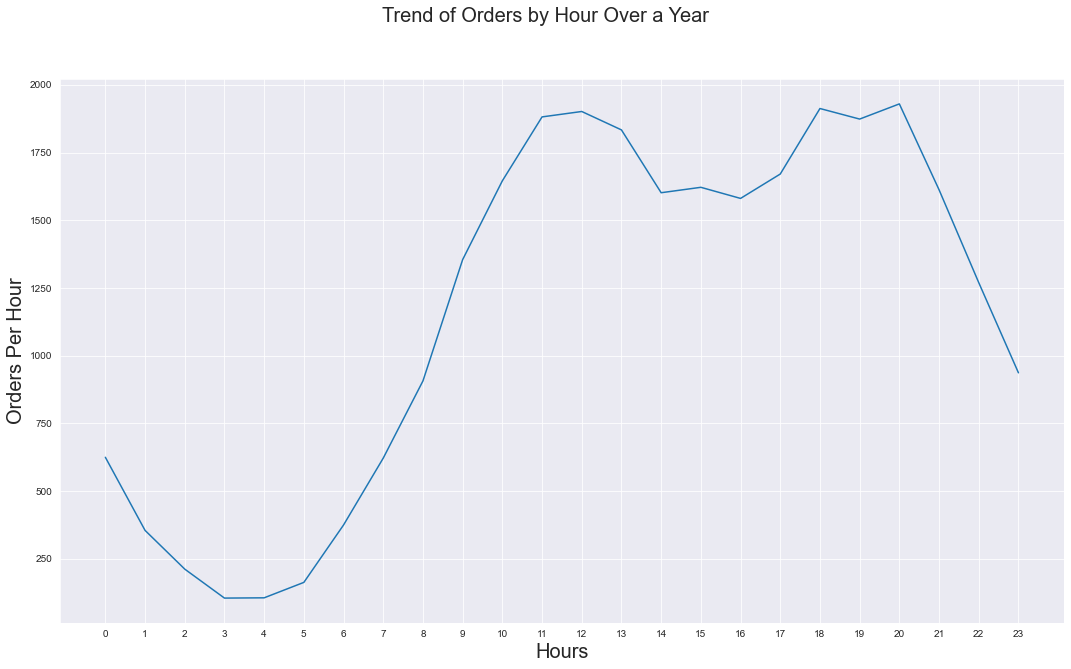

In [32]:
plt.figure(figsize=(18,10))
sns.set_style("darkgrid")
p = sns.lineplot(x=x, y=y)
p.set_xlabel("Hours", fontsize = 20)
p.set_ylabel("Orders Per Hour", fontsize = 20)
p.figure.suptitle('Trend of Orders by Hour Over a Year', fontsize = 20)
plt.xticks(x)
plt.show()


In [63]:
annual_df.head()

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales,Month
0,130767,Samsung Galexy S21,2,800,04/04/22 10:02,"Provider_11,Munich, Germany",NaN,1472.0,NaN,1472.0,4
1,130768,iPhone 13,1,1000,02/04/22 09:47,"Provider_9,Lagos, Nigeria",1000.0,NaN,NaN,1000.0,4
2,130769,iPhone 13,1,1000,29/04/22 09:06,"Provider_6,Moscow, Russia",1000.0,NaN,NaN,1000.0,4
3,130770,Samsung Galexy S22,1,1100,28/04/22 17:32,"Provider_2,Delhi, India",1100.0,NaN,NaN,1100.0,4
4,130771,Samsung Galexy S22,1,1100,10/04/22 00:48,"Provider_7,Yokohama, Japan",1100.0,NaN,NaN,1100.0,4


In [64]:
phone_type = annual_df.groupby('Phone')

In [68]:
phone_type.sum()
qty_ord = phone_type.sum()['Quatity Ordered']

In [69]:
qty_ord

Phone
Google Android        3556
Huawei                4183
Nokia c100            1329
Nokia c200            2359
Samsung Galexy S10    2489
Samsung Galexy S21    4248
Samsung Galexy S22    6146
Sony Xperia 10        3103
Sony Xperia 5         2402
iPhone 11             5527
iPhone 12             5170
iPhone 13             7593
Name: Quatity Ordered, dtype: int32

In [70]:
products = [product for product, df in phone_type]

TypeError: 'str' object is not callable

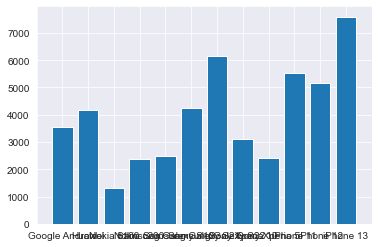

In [77]:
plt.bar(products,qty_ord)
plt.xlabel('Phone Type')
plt.ylabel('Quantity Ordered')

plt.xticks(products, rotation = 90)
plt.show()


## Time Analysis

In [ ]:
time_ana = annual_df
time_ana

In [ ]:
time_ana['Order Date'] = pd.to_datetime(time_ana['Order Date'])

In [ ]:
time_ana.dtypes

In [ ]:
time_ana['Hour'] = time_ana['Order Date'].dt.hour
time_ana['Minute'] = time_ana['Order Date'].dt.minute
time_ana['Count'] = 1
time_ana

In [ ]:
hours = [hour for hour, df in time_ana.groupby('Hour')]
plt.plot(hours, time_ana.groupby(['Hour']).count())

In [ ]:
#time_ana.dtypes
hours

In [ ]:
hours = [hour for hour, df in time_ana.groupby('Hour')]
#plt.plot(hours, time_ana.groupby(['Hour']).count())
#hours = pd.Series(hours)
hours

In [ ]:
Check = time_ana.groupby(['Hour']).count()
Check
#hours

In [ ]:
#plt.plot(time_ana.groupby(['Hour']).count())

x= hours
y = time_ana.groupby(['Hour']).count()
plt.plot(x,y)
plt.legend()

In [ ]:
time_ana.dtypes

In [ ]:
time_ana = time_ana.drop(['No Discount - Single Purchase', 'Sales_Less_Discount(8%)', 'Sales_Less_Discount(15%)'], axis=1)

In [ ]:
time_ana.dtypes

In [ ]:
time_ana

In [ ]:
data_by_hr = time_ana.groupby('Hour', as_index=False).count()
data_by_hr.set_index('Purchase Country_City', inplace=False)
data_by_hr.head()

In [ ]:
hours = [hour for hour, time_ana in time_ana.groupby('Hour')]

hours

In [ ]:
df_x = (data_by_hr.groupby(['Hour'], as_index=False).sum())
df_x

In [ ]:
df_x.reset_index()
df_x

In [ ]:
plt.plot(hours, df_x.groupby(['Month']))